In [2]:
# overall energy_consumption_trends
# highest energy consumption and lowest energy consumption
# variation by location

In [3]:
!pip --version
!pip install pandas
!pip install kaggle
!pip install codeium-jupyter

pip 24.0 from C:\ProgramData\anaconda3\Lib\site-packages\pip (python 3.12)

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [5]:
from urllib.request import urlretrieve
import requests
# url = "https://raw.githubusercontent.com/Sanket9122/datasets/refs/heads/main/Energy%20Consumptions%20Dataset.csv?token=GHSAT0AAAAAAC5EBWUN2NDXBEQC73T74E44Z5MXE4Q"
# response = requests.get(url)
# if response.status_code == 200  :
#     print ('url is correct :{response.status_code}')
#     urlretrieve("https://raw.githubusercontent.com/Sanket9122/datasets/refs/heads/main/Energy%20Consumptions%20Dataset.csv?token=GHSAT0AAAAAAC5EBWUN2NDXBEQC73T74E44Z5MXE4Q" , "energy_trends.csv")
#     energy_trends_df = pd.read_csv('energy_trends.csv')
# else :
    # print ({response.status_code}

In [6]:
energy_trends_df = pd.read_csv('Energy Consumptions Dataset.csv')

In [7]:
energy_trends_df

,Date,Building,Water Consumption,Electricity Consumption,Gas Consumption
0,01/01/2016,B1000,346159,38819,3378
1,01/01/2016,B1001,281717,46252,2187
2,01/01/2016,B1002,259530,41091,3173
3,01/01/2016,B1003,309176,25577,3581
4,01/01/2016,B1004,257742,33917,4709
...,...,...,...,...,...
523,12/01/2019,B1006,296157,33938,4931
524,12/01/2019,B1007,319388,37106,4748
525,12/01/2019,B1008,251866,47079,5909
526,12/01/2019,B1009,280510,48134,5492


In [8]:
energy_trends_df['Date'] =  pd.to_datetime(energy_trends_df['Date'],format = "%d/%m/%Y")
energy_trends_df

,Date,Building,Water Consumption,Electricity Consumption,Gas Consumption
0,2016-01-01,B1000,346159,38819,3378
1,2016-01-01,B1001,281717,46252,2187
2,2016-01-01,B1002,259530,41091,3173
3,2016-01-01,B1003,309176,25577,3581
4,2016-01-01,B1004,257742,33917,4709
...,...,...,...,...,...
523,2019-01-12,B1006,296157,33938,4931
524,2019-01-12,B1007,319388,37106,4748
525,2019-01-12,B1008,251866,47079,5909
526,2019-01-12,B1009,280510,48134,5492


In [9]:
print(energy_trends_df.isnull().sum())
print(energy_trends_df.duplicated().sum())

Date                       0
Building                   0
Water Consumption          0
Electricity Consumption    0
Gas Consumption            0
dtype: int64
0


In [10]:
type(energy_trends_df)

pandas.core.frame.DataFrame

In [11]:
energy_trends_df.head(80)


,Date,Building,Water Consumption,Electricity Consumption,Gas Consumption
0,2016-01-01,B1000,346159,38819,3378
1,2016-01-01,B1001,281717,46252,2187
2,2016-01-01,B1002,259530,41091,3173
3,2016-01-01,B1003,309176,25577,3581
4,2016-01-01,B1004,257742,33917,4709
...,...,...,...,...,...
75,2016-01-07,B1009,205516,37058,5334
76,2016-01-07,B1010,333281,50319,4902
77,2016-01-08,B1000,252698,45063,2995
78,2016-01-08,B1001,223918,33654,4406


In [12]:
energy_trends_df.tail(80)

,Date,Building,Water Consumption,Electricity Consumption,Gas Consumption
448,2019-01-05,B1008,293969,38654,4795
449,2019-01-05,B1009,226483,51402,5230
450,2019-01-05,B1010,380881,51980,4578
451,2019-01-06,B1000,236306,38618,6919
452,2019-01-06,B1001,502128,39206,5801
...,...,...,...,...,...
523,2019-01-12,B1006,296157,33938,4931
524,2019-01-12,B1007,319388,37106,4748
525,2019-01-12,B1008,251866,47079,5909
526,2019-01-12,B1009,280510,48134,5492


In [13]:
energy_trends_df.sample(25)

,Date,Building,Water Consumption,Electricity Consumption,Gas Consumption
503,2019-01-10,B1008,458539,35108,5453
85,2016-01-08,B1008,221813,49394,2610
526,2019-01-12,B1009,280510,48134,5492
282,2018-01-02,B1007,290750,47509,3947
106,2016-01-10,B1007,444777,34513,5362
427,2019-01-03,B1009,504470,44325,4483
409,2019-01-02,B1002,264645,35953,6097
124,2016-01-12,B1003,229664,49339,4911
504,2019-01-10,B1009,329857,56335,5550
185,2017-01-05,B1009,475120,41177,4054


In [14]:
energy_trends_df.describe()

,Date,Water Consumption,Electricity Consumption,Gas Consumption
count,528,528.000000,528.000000,528.000000
mean,2017-07-07 18:00:00,352737.361742,41035.943182,4835.393939
min,2016-01-01 00:00:00,202733.000000,21445.000000,2149.000000
25%,2016-10-04 06:00:00,271849.750000,33845.500000,4074.500000
50%,2017-07-08 00:00:00,348379.000000,41085.000000,4851.500000
75%,2018-04-10 12:00:00,429888.250000,48677.250000,5590.500000
max,2019-01-12 00:00:00,505757.000000,59522.000000,7351.000000
std,NaN,90883.262407,9199.546250,1137.674361


In [15]:
energy_trends_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     528 non-null    datetime64[ns]
 1   Building                 528 non-null    object        
 2   Water Consumption        528 non-null    int64         
 3   Electricity Consumption  528 non-null    int64         
 4   Gas Consumption          528 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 20.8+ KB


In [16]:
energy_trends_df.sort_values(by='Date')

,Date,Building,Water Consumption,Electricity Consumption,Gas Consumption
0,2016-01-01,B1000,346159,38819,3378
1,2016-01-01,B1001,281717,46252,2187
2,2016-01-01,B1002,259530,41091,3173
3,2016-01-01,B1003,309176,25577,3581
4,2016-01-01,B1004,257742,33917,4709
...,...,...,...,...,...
522,2019-01-12,B1005,337879,38611,4889
523,2019-01-12,B1006,296157,33938,4931
524,2019-01-12,B1007,319388,37106,4748
525,2019-01-12,B1008,251866,47079,5909


In [17]:
energy_trends_df['Total_Energy_Consumption'] = energy_trends_df['Water Consumption']+energy_trends_df['Electricity Consumption']+energy_trends_df['Gas Consumption']
energy_trends_df

,Date,Building,Water Consumption,Electricity Consumption,Gas Consumption,Total_Energy_Consumption
0,2016-01-01,B1000,346159,38819,3378,388356
1,2016-01-01,B1001,281717,46252,2187,330156
2,2016-01-01,B1002,259530,41091,3173,303794
3,2016-01-01,B1003,309176,25577,3581,338334
4,2016-01-01,B1004,257742,33917,4709,296368
...,...,...,...,...,...,...
523,2019-01-12,B1006,296157,33938,4931,335026
524,2019-01-12,B1007,319388,37106,4748,361242
525,2019-01-12,B1008,251866,47079,5909,304854
526,2019-01-12,B1009,280510,48134,5492,334136


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

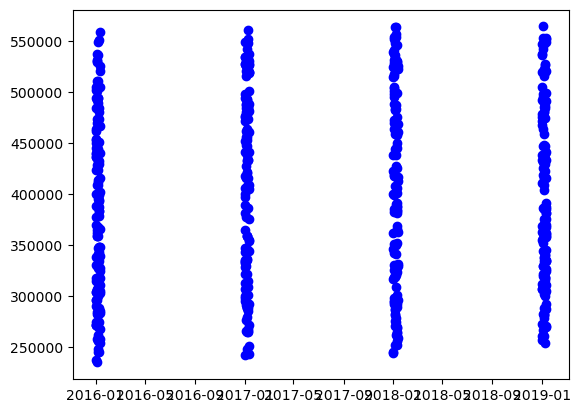

In [19]:
plt.plot(energy_trends_df['Date'] , energy_trends_df['Total_Energy_Consumption' ],linestyle="" , marker = 'o' , color = 'blue');

In [118]:
Water_Consumption = energy_trends_df[['Water Consumption', 'Date' , 'Building']]
Water_Consumption



,Water Consumption,Date,Building
0,346159,2016-01-01,B1000
1,281717,2016-01-01,B1001
2,259530,2016-01-01,B1002
3,309176,2016-01-01,B1003
4,257742,2016-01-01,B1004
...,...,...,...
523,296157,2019-01-12,B1006
524,319388,2019-01-12,B1007
525,251866,2019-01-12,B1008
526,280510,2019-01-12,B1009


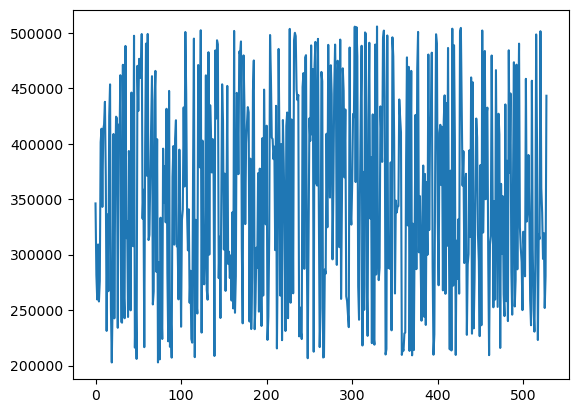

In [21]:
plt.plot(Water_Consumption['Water Consumption']);

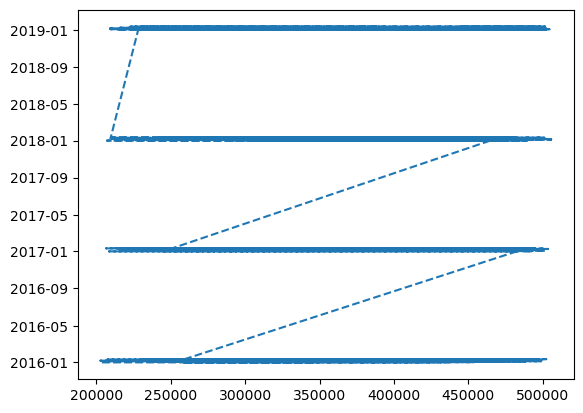

In [22]:
plt.plot(Water_Consumption['Water Consumption'] , Water_Consumption['Date'] , linestyle='dashed');

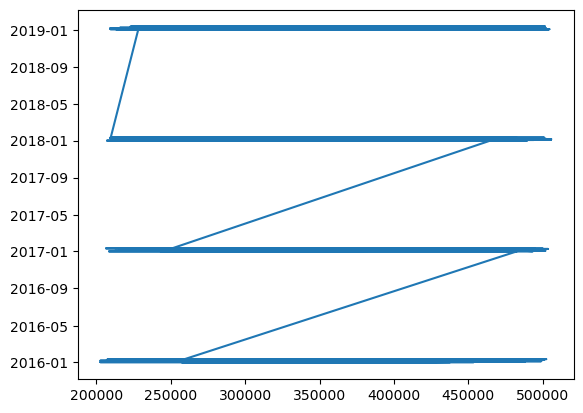

In [23]:
plt.plot(energy_trends_df['Water Consumption'] , energy_trends_df['Date'] );

In [24]:
energy_trends_df['average_energy_consumption'] = (energy_trends_df['Water Consumption']+energy_trends_df['Electricity Consumption']+energy_trends_df['Gas Consumption'])/3
energy_trends_df['average_energy_consumption']

0      129452.000000
1      110052.000000
2      101264.666667
3      112778.000000
4       98789.333333
           ...      
523    111675.333333
524    120414.000000
525    101618.000000
526    111378.666667
527    163639.666667
Name: average_energy_consumption, Length: 528, dtype: float64

In [25]:
average_water_consumption = sum(energy_trends_df['Water Consumption']) / len(energy_trends_df['Water Consumption'])
average_water_consumption

352737.36174242425

In [26]:
average_electricity_consumption = sum(energy_trends_df['Electricity Consumption']) / len(energy_trends_df['Electricity Consumption'])
average_electricity_consumption

41035.943181818184

In [27]:
average_gas_consumption  = sum(energy_trends_df['Gas Consumption']) /len(energy_trends_df['Gas Consumption'])
average_gas_consumption

4835.393939393939

In [28]:
highest_water_consumption = Water_Consumption.loc[Water_Consumption['Water Consumption'] .idxmax()]
highest_water_consumption

Water Consumption                 505757
Date                 2018-01-06 00:00:00
Name: 329, dtype: object

In [29]:
lowest_water_consumption = Water_Consumption.loc[Water_Consumption['Water Consumption'].idxmin()]
lowest_water_consumption

Water Consumption                 202733
Date                 2016-01-02 00:00:00
Name: 19, dtype: object

In [116]:
Electricity_Consumption = energy_trends_df[['Electricity Consumption' ,'Date' , 'Building']]
Electricity_Consumption

,Electricity Consumption,Date,Building
0,38819,2016-01-01,B1000
1,46252,2016-01-01,B1001
2,41091,2016-01-01,B1002
3,25577,2016-01-01,B1003
4,33917,2016-01-01,B1004
...,...,...,...
523,33938,2019-01-12,B1006
524,37106,2019-01-12,B1007
525,47079,2019-01-12,B1008
526,48134,2019-01-12,B1009


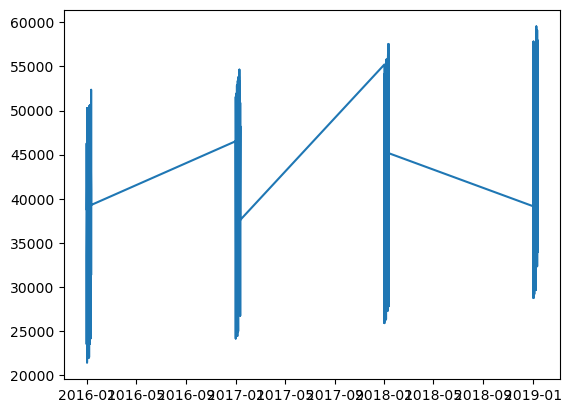

In [31]:
plt.plot(Electricity_Consumption['Date'] , Electricity_Consumption['Electricity Consumption']);

In [32]:
highest_electricity_consumption  = Electricity_Consumption.loc[Electricity_Consumption['Electricity Consumption'] . idxmax()]
highest_electricity_consumption

Electricity Consumption                  59522
Date                       2019-01-09 00:00:00
Name: 490, dtype: object

In [33]:
lowest_electricity_consumption = Electricity_Consumption.loc[Electricity_Consumption['Electricity Consumption'] . idxmin()]
lowest_electricity_consumption

Electricity Consumption                  21445
Date                       2016-01-02 00:00:00
Name: 16, dtype: object

In [120]:
Gas_Consumption  = energy_trends_df[[ 'Gas Consumption' , 'Date', 'Building']]
Gas_Consumption

,Gas Consumption,Date,Building
0,3378,2016-01-01,B1000
1,2187,2016-01-01,B1001
2,3173,2016-01-01,B1002
3,3581,2016-01-01,B1003
4,4709,2016-01-01,B1004
...,...,...,...
523,4931,2019-01-12,B1006
524,4748,2019-01-12,B1007
525,5909,2019-01-12,B1008
526,5492,2019-01-12,B1009


In [35]:
highest_gas_consumption = Gas_Consumption.loc[Gas_Consumption['Gas Consumption']. idxmax()]
highest_gas_consumption


Date               2019-01-09 00:00:00
Gas Consumption                   7351
Name: 485, dtype: object

In [36]:

lowest_gas_consumption = Gas_Consumption.loc[Gas_Consumption['Gas Consumption'] . idxmin()]
lowest_gas_consumption

Date               2016-01-01 00:00:00
Gas Consumption                   2149
Name: 7, dtype: object

In [37]:
filtered_water_consumption  = Water_Consumption['Water Consumption'] > average_water_consumption
filtered_water_consumption

0      False
1      False
2      False
3      False
4      False
       ...  
523    False
524    False
525    False
526    False
527     True
Name: Water Consumption, Length: 528, dtype: bool

In [38]:
filtered_electricity_consumption = Electricity_Consumption['Electricity Consumption'] > average_electricity_consumption 
filtered_electricity_consumption

0      False
1       True
2       True
3      False
4      False
       ...  
523    False
524    False
525     True
526     True
527     True
Name: Electricity Consumption, Length: 528, dtype: bool

In [39]:
filtered_gas_consumption = Gas_Consumption['Gas Consumption'] > average_gas_consumption
filtered_gas_consumption


0      False
1      False
2      False
3      False
4      False
       ...  
523     True
524    False
525     True
526     True
527     True
Name: Gas Consumption, Length: 528, dtype: bool

In [40]:
# # for index, row in energy_trends_df.iterrows():
# #     if filtered_water_consumption.iloc[index]:
# def search_lesser_water_consumption(Water_Consumption  , average_water_consumption) :
#     for i in range(len(Water_Consumption)):
#         if Water_Consumption[i] == average_water_consumption :
#             return i
#     return -1

# index_of_lesser_water_consumption  = search_lesser_water_consumption(Water_Consumption['Water Consumption'] , average_water_consumption)
# if index_of_lesser_water_consumption != -1:
#     print({index_of_lesser_water_consumption})
    
    

In [41]:
numeric_data_trends = energy_trends_df.select_dtypes(include = [float , int])
numeric_data_trends

,Water Consumption,Electricity Consumption,Gas Consumption,Total_Energy_Consumption,average_energy_consumption
0,346159,38819,3378,388356,129452.000000
1,281717,46252,2187,330156,110052.000000
2,259530,41091,3173,303794,101264.666667
3,309176,25577,3581,338334,112778.000000
4,257742,33917,4709,296368,98789.333333
...,...,...,...,...,...
523,296157,33938,4931,335026,111675.333333
524,319388,37106,4748,361242,120414.000000
525,251866,47079,5909,304854,101618.000000
526,280510,48134,5492,334136,111378.666667


In [96]:
# use .loc[] for assignment: This ensures you're modifying the DataFrame correctly, avoiding the issue of modifying a copy.
Water_Consumption.loc[:,'comulative_sum_water_consumption'] = Water_Consumption['Water Consumption'].cumsum()
Water_Consumption

,Water Consumption,Date,comulative_sum_water_consumption
0,346159,2016-01-01,346159
1,281717,2016-01-01,627876
2,259530,2016-01-01,887406
3,309176,2016-01-01,1196582
4,257742,2016-01-01,1454324
...,...,...,...
523,296157,2019-01-12,184950281
524,319388,2019-01-12,185269669
525,251866,2019-01-12,185521535
526,280510,2019-01-12,185802045


In [98]:
Electricity_Consumption.loc[: , 'comulative_sum_electricity_consumption'] = Electricity_Consumption['Electricity Consumption'].cumsum()
Electricity_Consumption

,Electricity Consumption,Date,comulative_sum_electricity_consumption
0,38819,2016-01-01,38819
1,46252,2016-01-01,85071
2,41091,2016-01-01,126162
3,25577,2016-01-01,151739
4,33917,2016-01-01,185656
...,...,...,...
523,33938,2019-01-12,21492632
524,37106,2019-01-12,21529738
525,47079,2019-01-12,21576817
526,48134,2019-01-12,21624951


In [100]:
Gas_Consumption.loc[: , 'comulative_sum_gas_consumption'] = Gas_Consumption['Gas Consumption'].cumsum()
Gas_Consumption

,Date,Gas Consumption,comulative_sum_gas_consumption
0,2016-01-01,3378,3378
1,2016-01-01,2187,5565
2,2016-01-01,3173,8738
3,2016-01-01,3581,12319
4,2016-01-01,4709,17028
...,...,...,...
523,2019-01-12,4931,2531329
524,2019-01-12,4748,2536077
525,2019-01-12,5909,2541986
526,2019-01-12,5492,2547478


Text(0.5, 1.0, 'cum_sum_water_consumption')

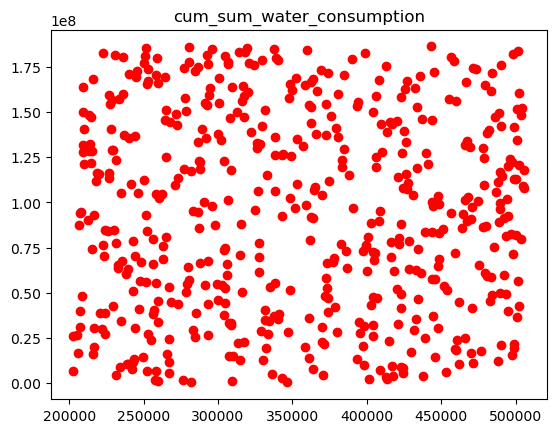

In [45]:
plt.scatter(Water_Consumption['Water Consumption'] , Water_Consumption['comulative_sum_water_consumption'], color = 'red')
plt.title('cum_sum_water_consumption')

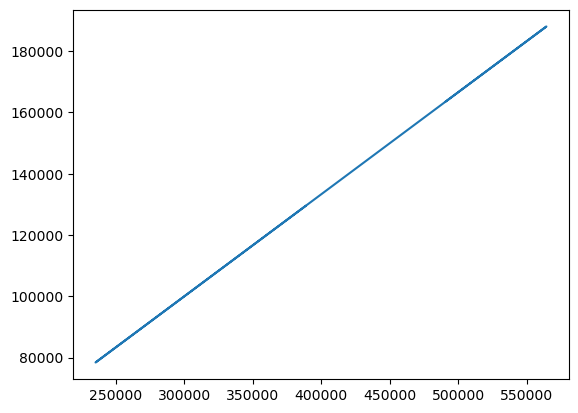

In [46]:
plt.plot(energy_trends_df['Total_Energy_Consumption'] , energy_trends_df['average_energy_consumption']);

<Axes: xlabel='Water Consumption', ylabel='Building'>

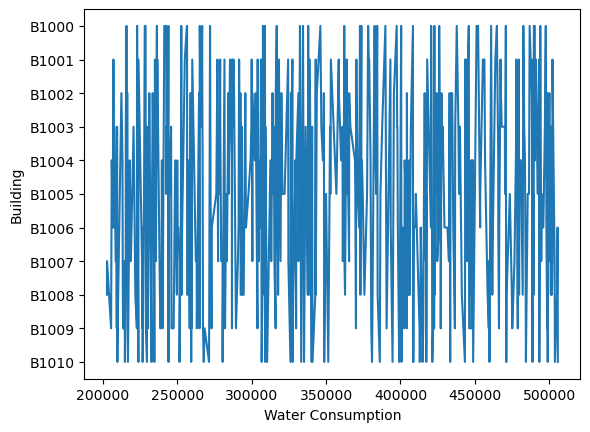

In [47]:
sns.lineplot(x=energy_trends_df['Water Consumption'] , y=energy_trends_df['Building'] )

In [164]:
high_water_consumption_building = Water_Consumption[Water_Consumption ['Water Consumption']> Water_Consumption['Water Consumption'].quantile(0.95)]
print(high_water_consumption_building[['Date','Building','Water Consumption']])

          Date Building  Water Consumption
45  2016-01-05    B1001             497381
54  2016-01-05    B1010             498942
61  2016-01-06    B1006             499003
105 2016-01-10    B1006             500791
115 2016-01-11    B1005             494823
123 2016-01-12    B1002             502349
162 2017-01-03    B1008             501733
204 2017-01-07    B1006             498064
227 2017-01-09    B1007             503577
233 2017-01-10    B1002             500052
234 2017-01-10    B1003             497034
303 2018-01-04    B1006             505586
305 2018-01-04    B1008             505186
315 2018-01-05    B1007             500394
316 2018-01-05    B1008             499220
329 2018-01-06    B1010             505757
337 2018-01-07    B1007             502045
341 2018-01-08    B1000             497647
347 2018-01-08    B1006             495985
377 2018-01-11    B1003             500850
398 2019-01-01    B1002             498748
417 2019-01-02    B1010             503772
426 2019-01

In [222]:
highest_water_consumption_building = high_water_consumption_building[['Water Consumption','Building']]
highest_water_consumption_building

,Water Consumption,Building
45,497381,B1001
54,498942,B1010
61,499003,B1006
105,500791,B1006
115,494823,B1005
123,502349,B1002
162,501733,B1008
204,498064,B1006
227,503577,B1007
233,500052,B1002


<Axes: >

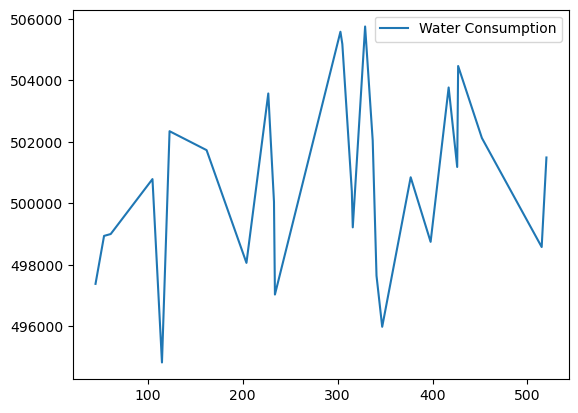

In [224]:
highest_water_consumption_building.plot()

In [144]:
high_electricity_consumption_building = Electricity_Consumption [Electricity_Consumption['Electricity Consumption']>Electricity_Consumption['Electricity Consumption'].quantile(0.95)]
high_electricity_consumption_building

,Electricity Consumption,Date,Building
264,55215,2018-01-01,B1000
319,55665,2018-01-06,B1000
325,55774,2018-01-06,B1006
363,56530,2018-01-10,B1000
365,56329,2018-01-10,B1002
366,55647,2018-01-10,B1003
376,56726,2018-01-11,B1002
378,57541,2018-01-11,B1004
380,55455,2018-01-11,B1006
381,56392,2018-01-11,B1007


In [216]:
highest_electricity_consumption_building = high_electricity_consumption_building[['Electricity Consumption' , 'Building']]
highest_electricity_consumption_building 

,Electricity Consumption,Building
264,55215,B1000
319,55665,B1000
325,55774,B1006
363,56530,B1000
365,56329,B1002
366,55647,B1003
376,56726,B1002
378,57541,B1004
380,55455,B1006
381,56392,B1007


<Axes: >

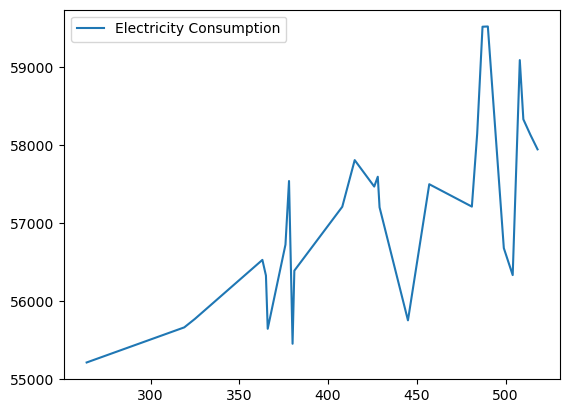

In [218]:
highest_electricity_consumption_building.plot()

In [156]:
high_gas_consumption_building =  Gas_Consumption[Gas_Consumption['Gas Consumption']  > Gas_Consumption['Gas Consumption'].quantile(0.95)]
high_gas_consumption_building

,Gas Consumption,Date,Building
410,7034,2019-01-02,B1003
417,6784,2019-01-02,B1010
419,7091,2019-01-03,B1001
428,6998,2019-01-03,B1010
440,6882,2019-01-05,B1000
441,7213,2019-01-05,B1001
443,6774,2019-01-05,B1003
444,6972,2019-01-05,B1004
445,6909,2019-01-05,B1005
451,6919,2019-01-06,B1000


In [204]:
highest_gas_consumption_building  = high_gas_consumption_building [['Gas Consumption' , 'Building']]
highest_gas_consumption_building

,Gas Consumption,Building
410,7034,B1003
417,6784,B1010
419,7091,B1001
428,6998,B1010
440,6882,B1000
441,7213,B1001
443,6774,B1003
444,6972,B1004
445,6909,B1005
451,6919,B1000


<Axes: >

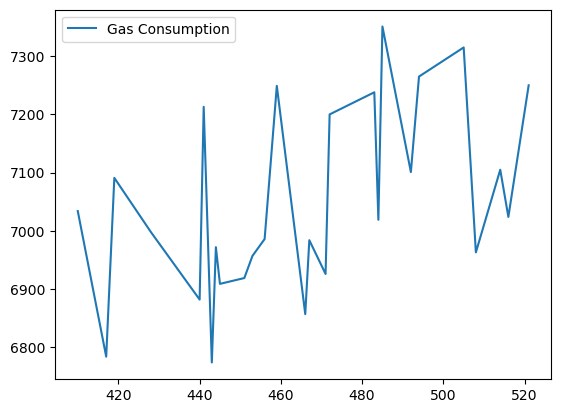

In [212]:
highest_gas_consumption_building.plot()